In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')
from sklearn.preprocessing import LabelEncoder
import numpy 

In [2]:
ds_health = pd.read_csv('data_cleaned.csv')

In [3]:
# Instantiate the Label Encoder Object
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Gender'] = label_encoder.fit_transform(ds_health['Gender'])

In [4]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Race'] = label_encoder.fit_transform(ds_health['Race'])

In [5]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Persistency_Flag'] = label_encoder.fit_transform(ds_health['Persistency_Flag'])

In [6]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Ethnicity'] = label_encoder.fit_transform(ds_health['Ethnicity'])

In [7]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Region'] = label_encoder.fit_transform(ds_health['Region'])

In [8]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Ntm_Speciality'] = label_encoder.fit_transform(ds_health['Ntm_Speciality'])

In [9]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Ntm_Specialist_Flag'] = label_encoder.fit_transform(ds_health['Ntm_Specialist_Flag'])

In [10]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Ntm_Speciality_Bucket'] = label_encoder.fit_transform(ds_health['Ntm_Speciality_Bucket'])

In [11]:
label_encoder = LabelEncoder()
# Fit and transform the column
ds_health['Adherent_Flag'] = label_encoder.fit_transform(ds_health['Adherent_Flag'])

In [12]:
ds_health = ds_health.drop(columns=['Ptid'])

## Feature Selection

In [13]:
def chi_square(df,var1,var2):
    df_ct = pd.crosstab(df[var1],df[var2])
    df_ct['Total']=df_ct.sum(axis=1)
    df_ct.loc['Total1'] = df_ct.sum(axis = 0, skipna = True)
    df_cq = pd.DataFrame()
    df_cq['Observed'] = np.array([df_ct.iloc[0][0],df_ct.iloc[0][1],df_ct.iloc[1][0],df_ct.iloc[1][1]])
    df_cq['Expected'] = np.array([(df_ct.loc[0]['Total'] * df_ct.loc['Total1'][0] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[0]['Total'] * df_ct.loc['Total1'][1] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[1]['Total'] * df_ct.loc['Total1'][0] / df_ct.loc['Total1']['Total']),
                                  (df_ct.loc[1]['Total'] * df_ct.loc['Total1'][1] / df_ct.loc['Total1']['Total']),
                                 ])
    df_cq['Chi-Square'] = ((df_cq['Observed'] - df_cq['Expected']) ** 2) / df_cq['Expected']
    chi_square =  df_cq['Chi-Square'].sum()
    return df_cq,chi_square

In [14]:
def variable_chiq(column):
    list_re = []
    for i in risk_column:
        result = chi_square(ds_health,i,'Persistency_Flag')
        list_re.append((i,result[1]))
    list_chiq = list(zip(list_re))
    return list_chiq

In [15]:
risk_column = [
 'Gender',
 'Ntm_Specialist_Flag',
 'Gluco_Record_Prior_Ntm', 
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Tscore_Bucket_During_Rx',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Type_1_Insulin_Dependent_Diabetes',
 'Risk_Osteogenesis_Imperfecta',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hyperthyroidism',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Untreated_Early_Menopause',
 'Risk_Patient_Parent_Fractured_Their_Hip',
 'Risk_Smoking_Tobacco',
 'Risk_Chronic_Malnutrition_Or_Malabsorption',
 'Risk_Chronic_Liver_Disease',
 'Risk_Family_History_Of_Osteoporosis',
 'Risk_Low_Calcium_Intake',
 'Risk_Vitamin_D_Insufficiency',
 'Risk_Poor_Health_Frailty',
 'Risk_Excessive_Thinness',
 'Risk_Hysterectomy_Oophorectomy',
 'Risk_Estrogen_Deficiency',
 'Risk_Immobilization',
 'Risk_Recurring_Falls']
variable_chiq(risk_column)

[(('Gender', 0.3662740573272759),),
 (('Ntm_Specialist_Flag', 66.52351844509595),),
 (('Gluco_Record_Prior_Ntm', 0.1135120264282353),),
 (('Gluco_Record_During_Rx', 154.9117442906466),),
 (('Dexa_During_Rx', 828.2305552641726),),
 (('Frag_Frac_Prior_Ntm', 0.0003460155406185617),),
 (('Frag_Frac_During_Rx', 39.154122704885225),),
 (('Risk_Segment_Prior_Ntm', 0.5115518918661821),),
 (('Tscore_Bucket_Prior_Ntm', 1.2235147986233286),),
 (('Tscore_Bucket_During_Rx', 0.22527552722228547),),
 (('Adherent_Flag', 43.32584810512328),),
 (('Idn_Indicator', 42.52224538360116),),
 (('Injectable_Experience_During_Rx', 33.12644286207904),),
 (('Idn_Indicator', 42.52224538360116),),
 (('Injectable_Experience_During_Rx', 33.12644286207904),),
 (('Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
   355.7205894617797),),
 (('Comorb_Encounter_For_Immunization', 339.50253384858087),),
 (('Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
   287.61712566345136),),
 (('Comorb_Vitamin_

In [16]:
feature_selected = ['Persistency_Flag',
 'Race',
 'Ethnicity', 
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Speciality_Bucket',
 'Dexa_Freq_During_Rx',
 'Ntm_Specialist_Flag',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_During_Rx',
 'Adherent_Flag',
 'Injectable_Experience_During_Rx',
 'Idn_Indicator',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_Systemic_Corticosteroids_Plain',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Fluoroquinolones',
 'Concom_Cephalosporins',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Smoking_Tobacco',
 'Risk_Chronic_Malnutrition_Or_Malabsorption',
 'Risk_Vitamin_D_Insufficiency',
 'Risk_Poor_Health_Frailty',
 'Risk_Excessive_Thinness',
 'Risk_Immobilization'
                   ]

In [17]:
df_fs = ds_health[feature_selected]
df_fs

,Persistency_Flag,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Ntm_Specialist_Flag,Gluco_Record_During_Rx,...,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization
0,1,2,1,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,4,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,2,1,3,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3420,1,2,1,3,0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,2,1,3,0,0,0,7,1,0,...,1,0,0,0,0,0,1,0,0,0
3422,0,2,1,3,2,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

In [18]:
from sklearn.model_selection import train_test_split as TTS
train,test=TTS(df_fs,test_size=0.15,random_state=0)

In [19]:
train_x = train.loc[:, train.columns != 'Persistency_Flag']
train_y = train['Persistency_Flag']
test_x = test.loc[:, test.columns != 'Persistency_Flag']
test_y = test['Persistency_Flag']

In [20]:
from sklearn.ensemble import RandomForestClassifier as RF
logit=RF(n_jobs=2,n_estimators=1000, max_depth=10, min_samples_split=12)
logit.fit(train_x,train_y)

RandomForestClassifier(max_depth=10, min_samples_split=12, n_estimators=1000,
                       n_jobs=2)

In [21]:
logit.score(train_x,train_y)

0.8852233676975945

In [22]:
logit.score(test_x,test_y)

0.8073929961089494

In [23]:
colum_p = train_x.columns.values.tolist()

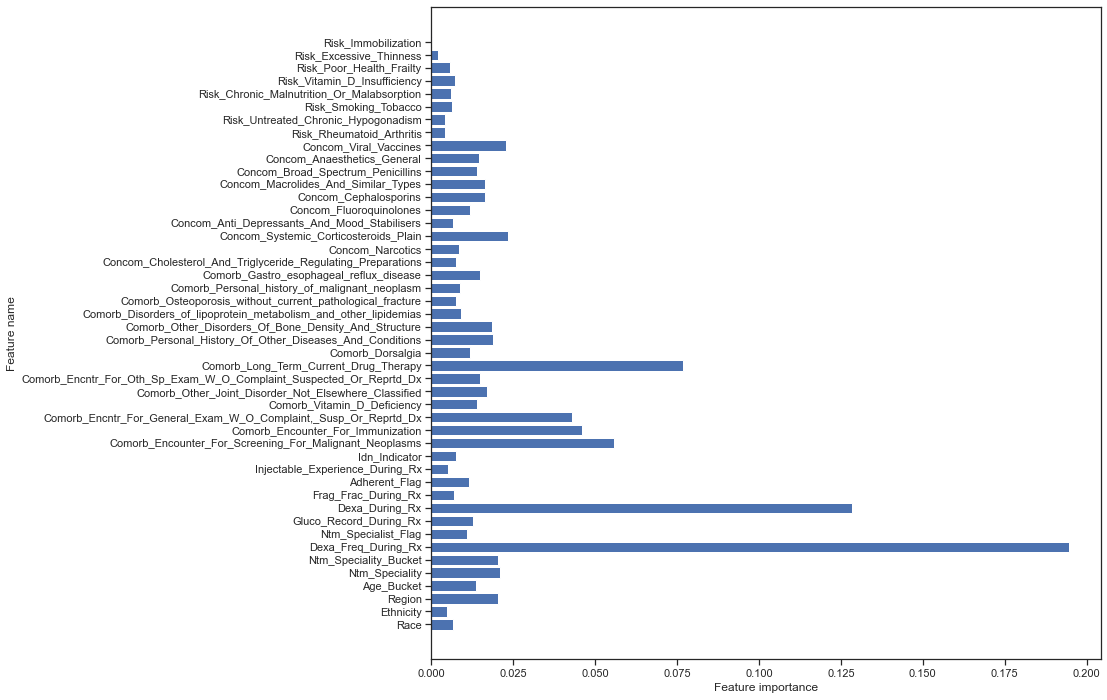

In [25]:
c_features = len(colum_p)
fig, ax = plt.subplots(figsize=(12, 12))
plt.barh(range(c_features), logit.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(numpy.arange(c_features), colum_p)
plt.show()

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\yellowbrick\classifier\base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


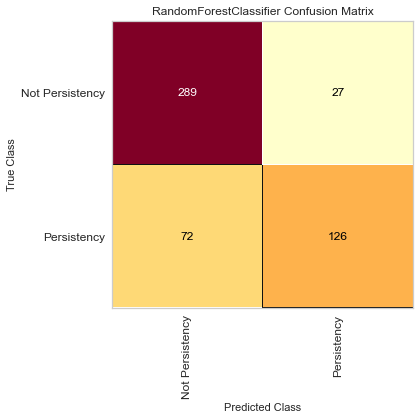

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
mapping = {0: "Not Persistency", 1: "Persistency"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    logit,
    classes=["Not Persistency", "Persistency"],
    label_encoder=mapping
)
cm_viz.score(test_x, test_y)
cm_viz.poof()

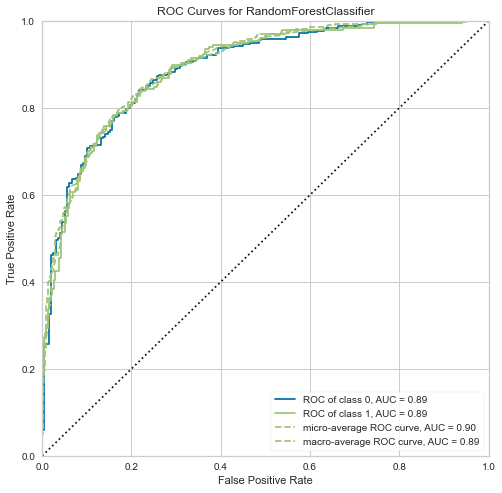

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(8, 8))
roc_viz = ROCAUC(logit)
roc_viz.fit(test_x, test_y) 
roc_viz.score(test_x, test_y)
roc_viz.poof()